In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd

df = pd.read_excel("/content/8. 2020 서울서베이 외국인(원시자료와 부호화 지침서).xlsx")
df.to_csv("/content/8. 2020 서울서베이 외국인(원시자료와 부호화 지침서).csv")

In [ ]:
#컬럼 이름 변경
f = open("/content/설문조사 라벨.txt", "r")

lines = f.readlines()
new_columns=[]
new_columns_name=[]
for line in lines:

  if len(line)<3 : continue; 
  elif line[-1] == "\n" and line[-2] == '\t':
      line=line[:-2]
  elif line[-1] == '\n':
      line=line[:-1]
  new_column = line.split(':')

  new_columns.append(new_column[0])
  new_columns_name.append(new_column[1])
f.close()

In [ ]:
# columns_drop=['date', 'ID', 'S1A', 'Q6A1', 'Q6A2', 'Q6A3', 'Q6A4', 'Q6A5', 'Q6A6', 'Q6A7', 'Q9', 'Q10A1', 'Q10A2', 'Q10A3', 'Q10A4', 'Q10A5',
#  'Q10A6', 'Q10A7', 'Q10A8', 'Q13A1', 'Q13A2', 'Q13A3', 'Q17A01', 'Q17A02', 'Q17A03', 'Q17A04', 'Q17A05', 'Q17A06', 'Q17A07', 'Q17B', 
#  'Q27A','DE1', 'DE2', 'DE3', 'DE4', 'DE5', 'DE6', 'DE7', 'DE8', 'DE9','RWT', 'RWT1','Q18A1','Q18A2','Q18A3','Q18A4','Q20A1','Q20A2','Q21','Q21A','Q22','Q23A1','Q23A2']

In [ ]:
# for i in range(len(df3.columns)):
#   print(df3.columns[i],'  ',df3.isna().sum().tolist()[i])

In [ ]:
# for i in df3.columns:
#  print(df3[i].unique())
import numpy as np

#필요한 컬럼만 추출
df2=df[new_columns]
#컬럼이름병경
df2.columns=new_columns_name

em_change=np.sort(df2['고용변화'].unique())
country=np.sort(df2['국적'].unique())
bisa=np.sort(df2['체류자격'].unique())
house=np.sort(df2['주거형태'].unique())
sex=np.sort(df2['성별'].unique())
job=np.sort(df2['직업'].unique())
em_role=np.sort(df2['고용형태'].unique())
grade=np.sort(df2['학력'].unique())

categories=[em_change,country,bisa,house,sex,job,em_role,grade]
categories2=['고용변화','국적','체류자격','주거형태','성별','직업','고용형태','학력']

In [ ]:
#수치형 데이터를 범주형으로 변경
em_change_new=['해당없음','임금증가','휴직이나 임금감소','해고','변화없음(근로자)','매출 증가','영업시간 단축/휴업 및 매출감소','폐업','변화없음(사장)','구직 어려움으로 인한 실업 기간 연장','변화없음(실업자)','구직 어려움으로 인한 실업 기간 연장','변화없음(비취업자)']
country_new=['한국계중국인','중국','일본','타이완','베트남','아시아' '기타','미국','영미권' '기타','유럽권','기타']
bisa_new=['방문취업', '전문인력','유학', '방문동거/거주/동반','재외동포','영주자','결혼이민자', '기타']
house_new=['① 단독주택(다가구포함)' ,'② 아파트', '③ 다세대주택', '④ 연립주택/빌라','⑤ 오피스텔', '⑥ 일터, 고시원, 쉼터' ,'⑦ 기타(상가내 거처 등)']
sex_new=['남','녀']
job_new=['① 관리자', '② 전문가 및 관련 종사자','③ 사무 종사자', '④ 서비스 종사자','⑤ 판매 종사자', '⑥ 농림어업 종사자',
'⑦ 기능원 및 관련 기능 종사자','⑧ 장치․기계 조작 및 조립 종사자','⑨ 단순노무 종사자', '⑩ 학생(문27로)','⑪ 주부(문27로)',' ⑫ 무직(문27로)']
em_role_new=['상용직 임금근로자', '임시직 임금근로자', '일용직 임금근로자', '특수고용종사자', '고용원이 있는 자영업자' ,'고용원이 없는 자영업자', '무급가족종사자','기타']
grade_new=['① 안 받았음','② 초등학교','③ 중학교','④ 고등학교','⑤ 대학(4년제 미만)','⑥ 대학교(4년제 이상)','⑦ 대학원 석사 과정','⑧ 대학원 박사 과정']

categories3=[em_change_new,country_new,bisa_new,house_new,sex_new,job_new,em_role_new,grade_new]

In [ ]:
for k in range(len(categories2)):
  for i in range(len(categories[k])):
    df2[categories2[k]][(df2[categories2[k]] == categories[k][i])] = categories3[k][i]
  # print(df2[categories2[k]].value_counts(),'\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df2['체류기간']=df2['체류기간(년)']*12 + df2['체류기간(월)']
df2['출근/등교시간']=df2['출근/등교시간(시)'] + df2['출근/등교시간(분)']/60
df2['한국어능력'] = df2['말하기(능력)'] + df2['읽기'] + df2['쓰기'] + df2['듣기']
df2['사회환경점수'] = df2['주거환경(삶의 질)']+df2['경제환경']+df2['복지환경']+df2['사회환경']+df2['교육환경']+df2['도시안전']
df2['한국적응어려움']=df2['언어(어려움)']+df2['자녀 양육 및 교육']+df2['한국식 생활 문화 적응']+df2['음식']+df2['외국인에 대한 사회적 편견, 차별']+df2['경제 활동 기회 획득']
+df2['한국인과의 원활한 유대 관계 맺기']+df2['공공 행정 기관을 통한 민원 제기 및 해결']+df2['지식 및 기술 습득을 위한 교육 기회 획득']
+df2['의료 기관 이용']+df2['주택 등 주거 공간']
df2['행복지수']=df2['건강상태(행복지수)']+df2['재정']+df2['사람관계']+df2['가정생활']+df2['사회생활']

df2 = df2.drop(columns = ['체류기간(년)', '체류기간(월)','출근/등교시간(시)', '출근/등교시간(분)','말하기(능력)', '읽기','쓰기','듣기','주거환경(삶의 질)', '경제환경',
                          '복지환경','사회환경','교육환경','도시안전','언어(어려움)','자녀 양육 및 교육','한국식 생활 문화 적응','음식','외국인에 대한 사회적 편견, 차별',
                          '경제 활동 기회 획득','한국인과의 원활한 유대 관계 맺기','공공 행정 기관을 통한 민원 제기 및 해결','지식 및 기술 습득을 위한 교육 기회 획득',
                          '건강상태(행복지수)','재정','사람관계','가정생활','사회생활','의료 기관 이용','주택 등 주거 공간']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#이상치를 평균으로 대체
df2.월세.loc[df2.월세>=200]=df2.월세.mean()
df2.보증금.loc[df2.보증금>99999]=df2.보증금.mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df2.corr()

,출생년도,보증금,월세,스트레스정도,건강상태,우울지표,월평균소득,체류기간,출근/등교시간,한국어능력,사회환경점수,한국적응어려움,행복지수
출생년도,1.000000,-0.116010,-0.057145,0.027316,0.139316,0.006929,-0.079677,-0.365660,-0.176150,-0.220119,0.031741,0.275242,0.104850
보증금,-0.116010,1.000000,0.253703,-0.067474,0.052369,0.007203,0.195586,0.090094,-0.015423,0.031318,0.077841,-0.238146,0.056662
월세,-0.057145,0.253703,1.000000,-0.124622,0.014906,-0.033391,0.382797,-0.004417,0.090992,-0.142700,-0.068033,0.094015,-0.021435
스트레스정도,0.027316,-0.067474,-0.124622,1.000000,-0.098431,0.156606,-0.111861,0.086949,0.098466,0.091717,-0.054275,0.021224,-0.239740
건강상태,0.139316,0.052369,0.014906,-0.098431,1.000000,-0.054985,0.115577,-0.064877,-0.052542,-0.141979,0.091757,0.043832,0.294239
우울지표,0.006929,0.007203,-0.033391,0.156606,-0.054985,1.000000,-0.018338,0.008172,0.017050,0.005176,0.017069,0.057758,-0.030479
월평균소득,-0.079677,0.195586,0.382797,-0.111861,0.115577,-0.018338,1.000000,-0.080180,0.009671,-0.149964,0.064201,0.032168,0.107214
체류기간,-0.365660,0.090094,-0.004417,0.086949,-0.064877,0.008172,-0.080180,1.000000,0.110857,0.348233,0.021218,-0.263776,-0.091473
출근/등교시간,-0.176150,-0.015423,0.090992,0.098466,-0.052542,0.017050,0.009671,0.110857,1.000000,0.125249,0.002767,-0.117467,-0.046297
한국어능력,-0.220119,0.031318,-0.142700,0.091717,-0.141979,0.005176,-0.149964,0.348233,0.125249,1.000000,0.130954,-0.399198,-0.062021


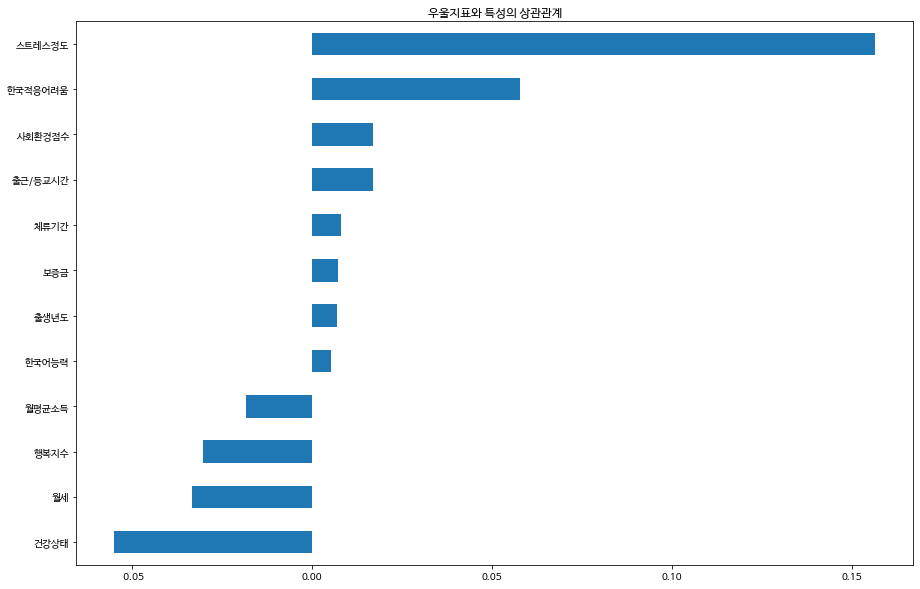

In [ ]:
#타겟과 상관관계
despress = df2.corr()['우울지표'].sort_values(ascending=False)[1:]

importances = pd.Series(despress.values, despress.index)


plt.figure(figsize=(15,10))
plt.title('우울지표와 특성의 상관관계')
importances.sort_values().plot.barh();

In [ ]:
df3=df2
df2.columns

21

In [ ]:
df2.head().T

,0,1,2,3,4
국적,미국,미국,미국,유럽권,기타
체류자격,재외동포,영주자,기타,재외동포,기타
출생년도,1997,1997,2000,1975,1973
주거형태,"⑥ 일터, 고시원, 쉼터","⑥ 일터, 고시원, 쉼터","⑥ 일터, 고시원, 쉼터",④ 연립주택/빌라,⑦ 기타(상가내 거처 등)
보증금,NaN,NaN,NaN,300.0,1000.0
월세,NaN,NaN,NaN,70.0,60.0
성별,녀,녀,남,남,남
스트레스정도,1,1,1,5,1
건강상태,5,4,3,4,5
우울지표,0,0,0,4,0


In [ ]:
#훈련,테스트 세트 나누기
from sklearn.model_selection import train_test_split
target = df2['우울지표']
train, test = train_test_split(df2, train_size=0.80, test_size=0.20, 
                              stratify=target, random_state=2)

In [ ]:
target = '우울지표'
features = train.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [ ]:
!pip install --upgrade category_encoders

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint
from category_encoders import TargetEncoder,OrdinalEncoder

pipe = make_pipeline(
      TargetEncoder()
    , SimpleImputer()
    , StandardScaler() 
    , SelectKBest(f_regression)
    , Ridge()
)

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], 
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median','most_frequent'], 
    'selectkbest__k': [20], 
    'ridge__alpha': randint(1,10), 
}

model = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=10,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

model.fit(X_train, y_train);

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print('최적 하이퍼파라미터: ', model.best_params_)
print('MAE: ', -model.best_score_)

최적 하이퍼파라미터:  {'ridge__alpha': 6, 'selectkbest__k': 20, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 4, 'targetencoder__smoothing': 1000.0}
MAE:  1.7088413512333944


In [ ]:
from sklearn.metrics import mean_absolute_error

model = model.best_estimator_
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'테스트세트 MAE: {mae}')

테스트세트 MAE: 1.7201579779872882


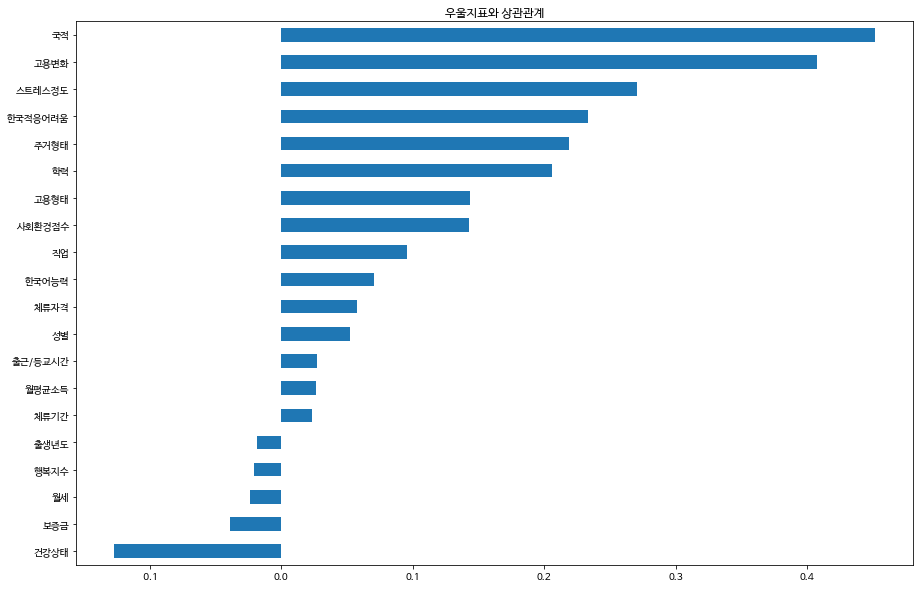

In [ ]:
coefficients = model.named_steps['ridge'].coef_
importances2 = pd.Series(coefficients, features).sort_values(ascending=False)

n = 20
plt.figure(figsize=(15,10))
plt.title(f'우울지표와 상관관계')
importances2.sort_values()[:].plot.barh();

In [ ]:
pip install eli5

In [ ]:
!pip install PDPbox

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

processor = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_test)

# encoder = make_pipeline(OrdinalEncoder()) #오디널이 적합하다
# X_train_encoded = encoder.fit_transform(X_train) 
# X_test_encoded = encoder.transform(X_test) 

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    max_depth = 10,
    cv=5,
    child_weight = 6,
    gamma = 0.5,
    learning_rate=0.2,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_test)]

boosting.fit(X_train_processed, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:4.99258	validation_1-rmse:5.04089
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:4.1506	validation_1-rmse:4.288
[2]	validation_0-rmse:3.47715	validation_1-rmse:3.69841
[3]	validation_0-rmse:2.9426	validation_1-rmse:3.25116
[4]	validation_0-rmse:2.50233	validation_1-rmse:2.94146
[5]	validation_0-rmse:2.16331	validation_1-rmse:2.74294
[6]	validation_0-rmse:1.88172	validation_1-rmse:2.58877
[7]	validation_0-rmse:1.67531	validation_1-rmse:2.47434
[8]	validation_0-rmse:1.52923	validation_1-rmse:2.40179
[9]	validation_0-rmse:1.39348	validation_1-rmse:2.35935
[10]	validation_0-rmse:1.26101	validation_1-rmse:2.32012
[11]	validation_0-rmse:1.17556	validation_1-rmse:2.3029
[12]	validation_0-rmse:1.11918	validation_1-rmse:2.29596
[13]	validation_0-rmse:1.0583	validation_1-rmse:2.27786
[14]	validation_0-rmse:1.01588	validation_1-rmse:2.2715
[15

XGBRegressor(child_weight=6, cv=5, gamma=0.5, learning_rate=0.2, max_depth=10,
             n_estimators=1000, n_jobs=-1, objective='reg:squarederror',
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
#결측치 평균으로 채우기
X_test_encoded=X_test_encoded.fillna(X_test_encoded.mean())

In [ ]:
X_test['국적'].value_counts()

한국계중국인    182
중국         64
아시아기타      52
미국         51
베트남        29
영미권기타      29
타이완        27
유럽권        27
일본         22
기타         17
Name: 국적, dtype: int64

In [ ]:
X_test_encoded['국적'].value_counts()

2     182
9      64
7      52
8      51
6      29
4      29
10     27
1      27
3      22
5      17
Name: 국적, dtype: int64

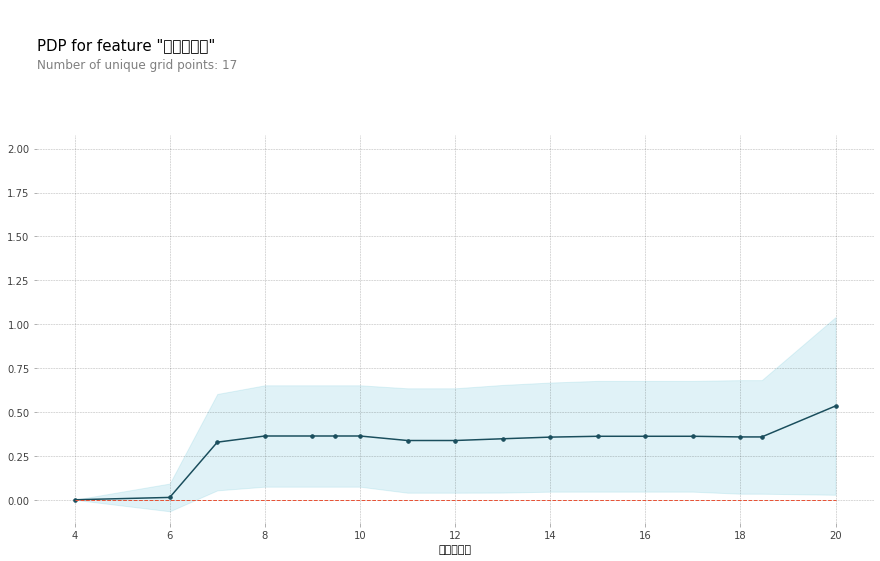

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
feature = '한국어능력'

isolated = pdp_isolate(
    model=boosting, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=50 # default=10
)
pdp_plot(isolated, feature_name=feature);

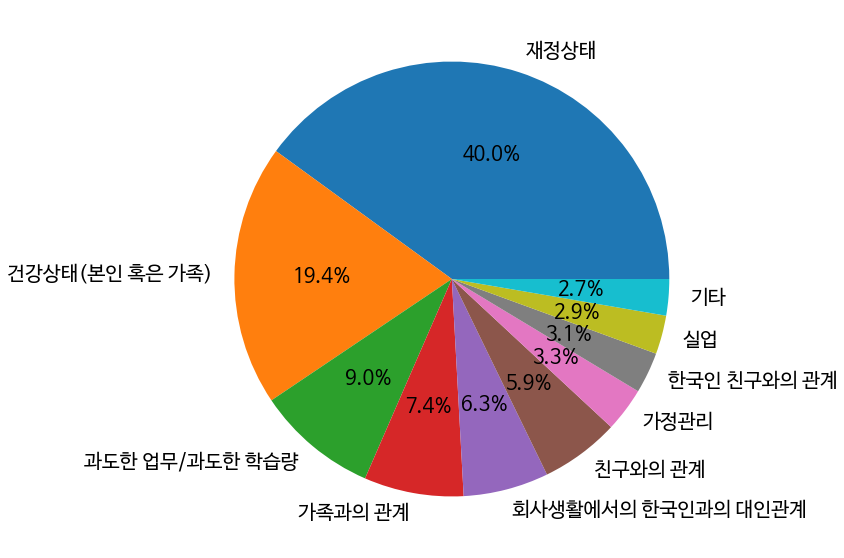

In [ ]:
ratio = df.Q8A1.value_counts().values
labels = ['재정상태',
'건강상태(본인 혹은 가족)', '과도한 업무/과도한 학습량',
'가족과의 관계', '회사생활에서의 한국인과의 대인관계',
'친구와의 관계',
'가정관리', '한국인 친구와의 관계',
'실업',
'기타']

plt.rc('font', size=20)
plt.figure(figsize=(10,10))
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
df.Q8A1.value_counts()

2.0     681
1.0     331
7.0     154
3.0     126
6.0     108
4.0     100
9.0      56
5.0      52
10.0     49
8.0      46
Name: Q8A1, dtype: int64

In [ ]:
X_test.고용변화.value_counts()

변화없음(근로자)               162
해당없음                    118
휴직이나 임금감소                90
구직 어려움으로 인한 실업 기간 연장     48
변화없음(사장)                 19
영업시간 단축/휴업 및 매출감소        16
해고                       14
변화없음(비취업자)               14
임금증가                     11
변화없음(실업자)                 4
폐업                        2
매출 증가                     2
Name: 고용변화, dtype: int64

In [ ]:
X_test_encoded.고용변화.value_counts()

1     162
2     118
3      90
5      48
9      19
8      16
11     14
4      14
6      11
10      4
7       2
12      2
Name: 고용변화, dtype: int64

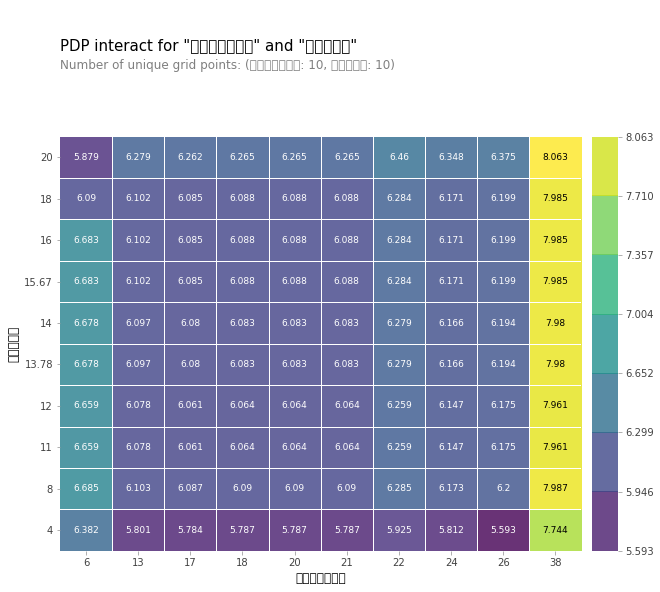

In [ ]:
features = ['한국적응어려움', '한국어능력']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_test_encoded,
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  figsize=(10,10),
                  feature_names=features);

In [ ]:
df2.groupby('성별').mean()[['우울지표']]



,우울지표
성별,
남,5.966116
녀,6.210853


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline,Pipeline

# pipe = Pipeline([
#     ('preprocessing',make_pipeline(TargetEncoder(), SimpleImputer())),
#     ('rf',RandomForestRegressor(random_state=2))
# ])

pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(), SimpleImputer(),StandardScaler())),
    ('rf', RandomForestRegressor(random_state=2)) 
])

dists = {
    'preprocessing__targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], 
    'preprocessing__targetencoder__min_samples_leaf': randint(1, 10),         
    'preprocessing__simpleimputer__strategy': ['mean', 'median','most_frequent'], 
    'rf__n_estimators': randint(50, 500), 
    'rf__max_depth': randint(0,30), 
    'rf__max_features': randint(0,50) # max_features
}

model3 = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=20, 
    cv=5, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

model3.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
print('최적 하이퍼파라미터: ', model3.best_params_)
print('트레인세트MAE: ', -model3.best_score_)

최적 하이퍼파라미터:  {'preprocessing__simpleimputer__strategy': 'median', 'preprocessing__targetencoder__min_samples_leaf': 2, 'preprocessing__targetencoder__smoothing': 1000.0, 'rf__max_depth': 17, 'rf__max_features': 5, 'rf__n_estimators': 284}
트레인세트MAE:  1.6602370989429904


In [ ]:
model3 = model3.best_estimator_
y_pred = model3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'테스트세트 MAE: {mae}')

테스트세트 MAE: 1.6629250121165178


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance


# permuter 정의
permuter = PermutationImportance(
    model3.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # metric
    n_iter=50, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_test_transformed = model3.named_steps['preprocessing'].transform(X_test)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test_transformed, y_test);

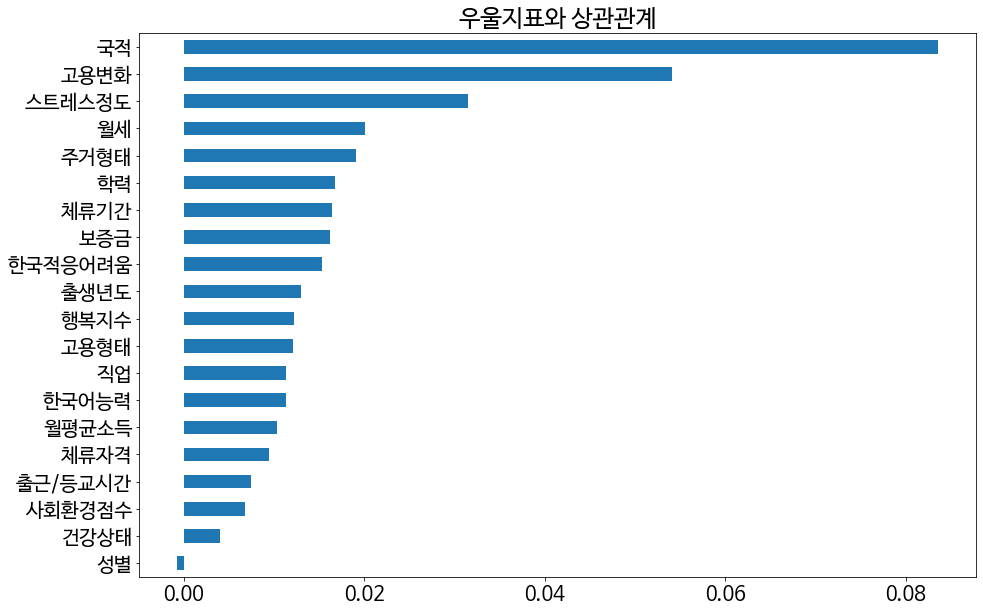

In [ ]:
feature_names = X_test.columns.tolist()
importances = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

n = 20
plt.figure(figsize=(15,10))
plt.title('우울지표와 상관관계')
importances.sort_values()[-n:].plot.barh();

In [ ]:
y_pred = model3.predict(X_test)
print('R^2', r2_score(y_test, y_pred))

R^2 0.15396255081155408


In [ ]:
row = X_test.iloc[[250]]
row

,국적,체류자격,출생년도,주거형태,보증금,월세,성별,스트레스정도,건강상태,고용변화,직업,고용형태,월평균소득,학력,체류기간,출근/등교시간,한국어능력,사회환경점수,한국적응어려움,행복지수
1447,한국계중국인,재외동포,1950,② 아파트,20000.0,40.0,남,2,4,변화없음(비취업자),⑫ 무직(문27로),NaN,NaN,⑤ 대학(4년제 미만),14,NaN,16,25,30,40


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 7.6 MB/s 


In [ ]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_test_encoded = encoder.transform(X_test) # 검증데이터

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:5.02442	validation_1-rmse:5.01227
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:4.23885	validation_1-rmse:4.22868
[2]	validation_0-rmse:3.64217	validation_1-rmse:3.64161
[3]	validation_0-rmse:3.19694	validation_1-rmse:3.20692
[4]	validation_0-rmse:2.87384	validation_1-rmse:2.89968
[5]	validation_0-rmse:2.64125	validation_1-rmse:2.67942
[6]	validation_0-rmse:2.47483	validation_1-rmse:2.52875
[7]	validation_0-rmse:2.35774	validation_1-rmse:2.4218
[8]	validation_0-rmse:2.27253	validation_1-rmse:2.35036
[9]	validation_0-rmse:2.21495	validation_1-rmse:2.30435
[10]	validation_0-rmse:2.17414	validation_1-rmse:2.28332
[11]	validation_0-rmse:2.14362	validation_1-rmse:2.26394
[12]	validation_0-rmse:2.11653	validation_1-rmse:2.24504
[13]	validation_0-rmse:2.09839	validation_1-rmse:2.23396
[14]	validation_0-rmse:2.08365	validation_1-rmse:2.228

XGBRegressor(learning_rate=0.2, n_estimators=1000, n_jobs=-1,
             objective='reg:squarederror')

In [ ]:
## UnicodeDecoderError 발생시 xgboost 1.1-> 1.0 다운그레이드 (conda install -c conda-forge xgboost=1.0)
import xgboost
import shap

row = X_test.loc[X_test.행복지수>45].iloc[[11]]

explainer = shap.TreeExplainer(boosting)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

13.444

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

print('fully paid 예측에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')
    

fully paid 예측에 대한 Positive 요인 Top 3 입니다:
1. 월세 : 50.0
2. 보증금 : 20000.0
3. 체류기간 : 56


Negative 요인 Top 3 입니다:
1. 국적 : 유럽권
2. 체류자격 : 전문인력
3. 월평균소득 : 8.0


In [ ]:
X_test.한국적응어려움.mean()

19.92

In [ ]:
X_test.loc[X_test.행복지수<2].reset_index()

,index,국적,체류자격,출생년도,주거형태,보증금,월세,성별,스트레스정도,건강상태,...,직업,고용형태,월평균소득,학력,체류기간,출근/등교시간,한국어능력,사회환경점수,한국적응어려움,행복지수
0,1945,아시아기타,방문취업,1992,⑦ 기타(상가내 거처 등),1000.0,20.000000,녀,4,3,...,④ 서비스 종사자,일용직 임금근로자,2.0,④ 고등학교,5,0.333333,9,21,24,15
1,668,중국,영주자,1969,① 단독주택(다가구포함),NaN,NaN,남,2,2,...,④ 서비스 종사자,상용직 임금근로자,3.0,④ 고등학교,42,1.000000,13,24,21,14
2,2186,한국계중국인,재외동포,1984,⑤ 오피스텔,0.0,40.000000,남,3,3,...,⑫ 무직(문27로),NaN,NaN,② 초등학교,18,NaN,18,23,18,19
3,703,유럽권,재외동포,1973,④ 연립주택/빌라,600.0,101.588794,녀,2,4,...,④ 서비스 종사자,무급가족종사자,5.0,⑥ 대학교(4년제 이상),13,0.250000,4,15,23,19
4,690,한국계중국인,재외동포,1968,① 단독주택(다가구포함),NaN,NaN,녀,2,2,...,⑨ 단순노무 종사자,일용직 임금근로자,3.0,② 초등학교,196,1.333333,13,21,22,10
5,58,베트남,전문인력,1992,③ 다세대주택,500.0,101.588794,남,1,3,...,② 전문가 및 관련 종사자,상용직 임금근로자,4.0,⑦ 대학원 석사 과정,12,NaN,10,25,26,19
6,2366,기타,기타,1978,④ 연립주택/빌라,NaN,NaN,남,3,4,...,④ 서비스 종사자,임시직 임금근로자,3.0,④ 고등학교,12,0.833333,10,20,26,17


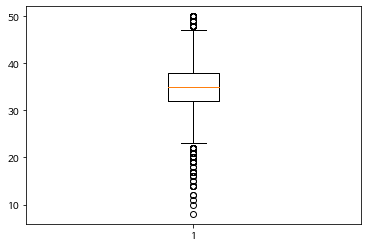

In [ ]:
# df2.우울지표.mean()
plt.boxplot(df2.행복지수)

plt.show()

(array([100.,  43., 108.,  99.,  99., 394., 326., 582., 543., 206.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

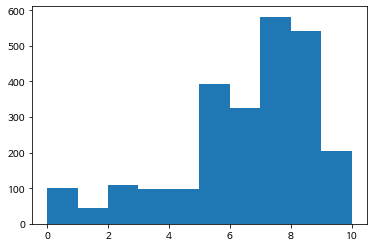

In [ ]:
plt.hist(df2.우울지표)

In [ ]:
y_test.iloc[[40]]

1639    5
Name: 우울지표, dtype: int64

In [ ]:
n=199
print(y_test.iloc[[n]])
model3.predict(X_test.iloc[[n]])

1060    6
Name: 우울지표, dtype: int64


array([5.12451074])

In [ ]:
X_test.columns

Index(['국적', '체류자격', '출생년도', '주거형태', '보증금', '월세', '성별', '스트레스정도', '건강상태',
       '고용변화', '직업', '고용형태', '월평균소득', '학력', '체류기간', '출근/등교시간', '한국어능력',
       '사회환경점수', '한국적응어려움', '행복지수'],
      dtype='object')

In [ ]:
# X_test_num=X_test[['출생년도','보증금','월세','스트레스정도','성별','건강상태','월평균소득','체류기간','출근/등교시간','한국어능력','사회환경점수','한국적응어려움','행복지수']]
# X_train_num=X_train[['출생년도','보증금','월세','스트레스정도','성별','건강상태','월평균소득','체류기간','출근/등교시간','한국어능력','사회환경점수','한국적응어려움','행복지수']]

# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train_num) # 학습데이터
# X_test_encoded = encoder.transform(X_test_num) # 검증데이터

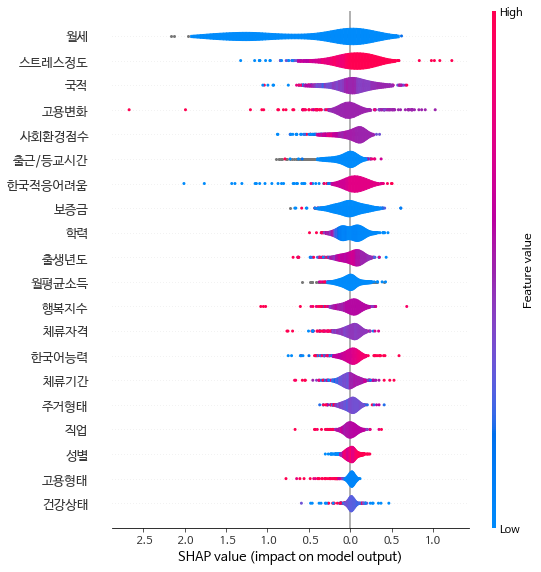

In [ ]:
shap.summary_plot(shap_values, X_test_encoded, plot_type="violin")

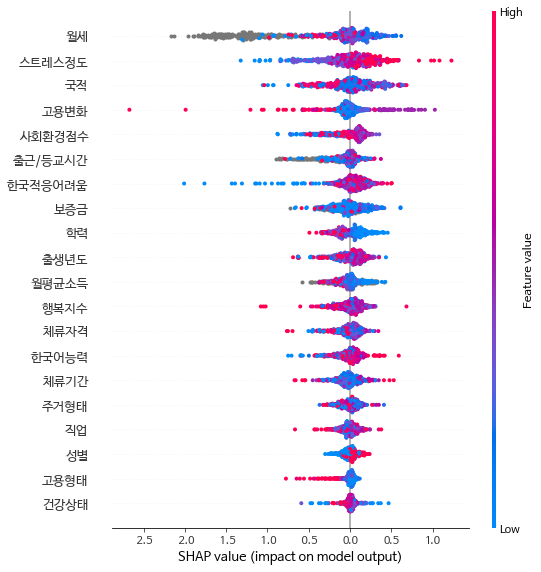

In [ ]:
shap_values = explainer.shap_values(X_test_encoded)
shap.summary_plot(shap_values, X_test_encoded)

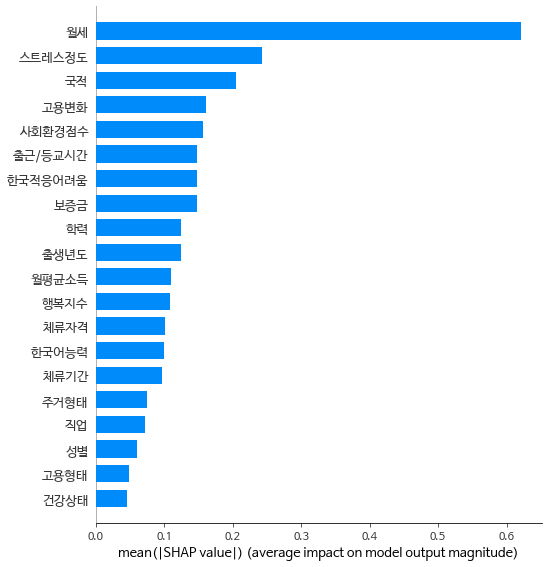

In [ ]:
shap.summary_plot(shap_values, X_test_encoded, plot_type = "bar")

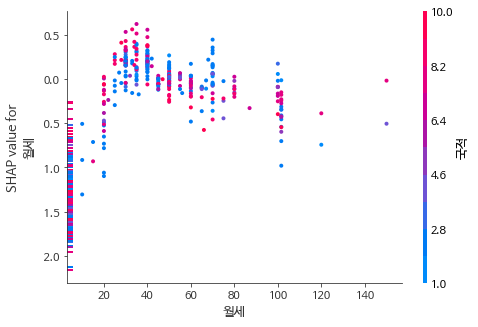

In [ ]:
shap.dependence_plot("월세", shap_values, X_test_encoded)